In [1]:
from keras import layers
from keras import models
import os

base_dir='C:/Users/havvanur/Desktop/data'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

C:\Users\havvanur\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
__________

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                 height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator=train_datagen.flow_from_directory(
                                                  train_dir,
                                                  target_size=(200,200),
                                                  batch_size=32,
                                                  class_mode='categorical')
test_generator=test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size=(200,200),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1731 images belonging to 10 classes.
Found 438 images belonging to 10 classes.


In [6]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break


data batch shape: (32, 200, 200, 3)
labels batch shape: (32, 10)


In [7]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=1731//32,
        epochs=20,
        validation_data=test_generator,
        validation_steps=438//32)
model.save('proje_model.h5')

Epoch 1/20
54/54 [==============================] - 220s 4s/step - loss: 1.6086 - acc: 0.3954 - val_loss: 1.1799 - val_acc: 0.6755
Epoch 2/20
54/54 [==============================] - 230s 4s/step - loss: 1.1419 - acc: 0.6246 - val_loss: 0.8821 - val_acc: 0.7524
Epoch 3/20
54/54 [==============================] - 223s 4s/step - loss: 0.9125 - acc: 0.7205 - val_loss: 0.7624 - val_acc: 0.7861
Epoch 4/20
54/54 [==============================] - 224s 4s/step - loss: 0.8548 - acc: 0.7226 - val_loss: 0.9187 - val_acc: 0.7404
Epoch 5/20
54/54 [==============================] - 233s 4s/step - loss: 0.6813 - acc: 0.7858 - val_loss: 0.6648 - val_acc: 0.8221
Epoch 6/20
54/54 [==============================] - 224s 4s/step - loss: 0.5870 - acc: 0.8084 - val_loss: 0.6206 - val_acc: 0.8534
Epoch 7/20
54/54 [==============================] - 216s 4s/step - loss: 0.6079 - acc: 0.8182 - val_loss: 0.4690 - val_acc: 0.8654
Epoch 8/20
54/54 [==============================] - 215s 4s/step - loss: 0.5293 - a

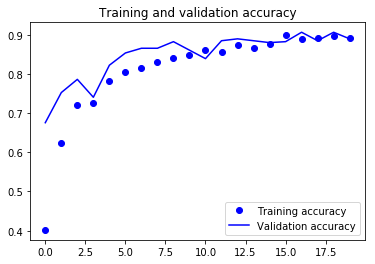

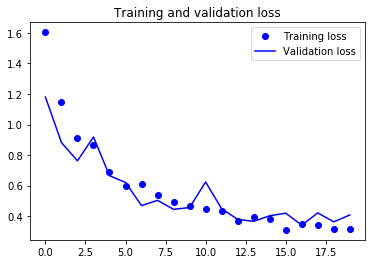

In [23]:

import matplotlib.pyplot as plt

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
from matplotlib import pyplot as plt

In [11]:
print("indisler ve sınıflar:")
print("0-airplane")
print("1-butterfly")
print("2-car")
print("3-cellphone")
print("4-cup")
print("5-dolphin")
print("6-headphone")
print("7-laptop")
print("8-motorbike")
print("9-pizza")


indisler ve sınıflar:
0-airplane
1-butterfly
2-car
3-cellphone
4-cup
5-dolphin
6-headphone
7-laptop
8-motorbike
9-pizza


In [12]:
import numpy as np
from keras.preprocessing import image

airplane sınıfı tahmin sonuçları
1.resim:


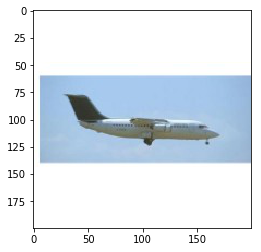

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
print("airplane sınıfı tahmin sonuçları")
print("1.resim:")
test_image1 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/airplanes/image_0652.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image1)
plt.show()

test_image1 = image.img_to_array(test_image1)
test_image1= np.expand_dims(test_image1, axis=0)
result = model.predict(test_image1)
result


2.resim:


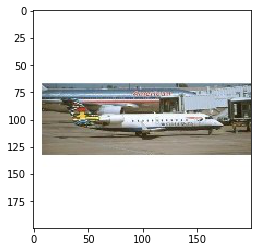

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [72]:
print("2.resim:")
test_image2 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/airplanes/image_0649.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image2)
plt.show()

test_image2 = image.img_to_array(test_image2)
test_image2= np.expand_dims(test_image2, axis=0)
result2= model.predict(test_image2)
result2


3.resim:


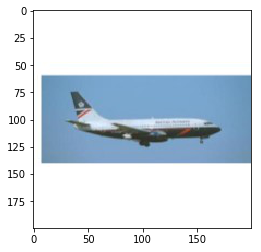

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
print("3.resim:")
test_image3 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/airplanes/image_0641.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image3)
plt.show()

test_image3 = image.img_to_array(test_image3)
test_image3= np.expand_dims(test_image3, axis=0)
result3 = model.predict(test_image3)
result3


4.resim:


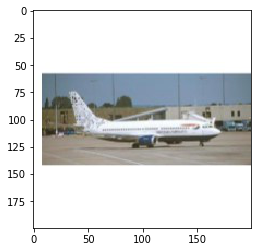

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [74]:
print("4.resim:")
test_image4 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/airplanes/image_0650.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image4)
plt.show()

test_image4= image.img_to_array(test_image4)
test_image4= np.expand_dims(test_image4, axis=0)
result4= model.predict(test_image4)
result4


5.resim:


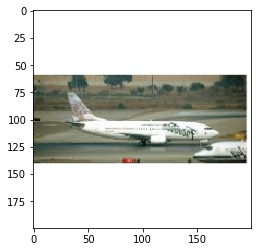

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
print("5.resim:")
test_image5 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/airplanes/image_0729.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image5)
plt.show()

test_image5 = image.img_to_array(test_image5)
test_image5= np.expand_dims(test_image5, axis=0)
result5 = model.predict(test_image5)
result5

butterfly sınıfı tahmin sonuçları
1.resim:


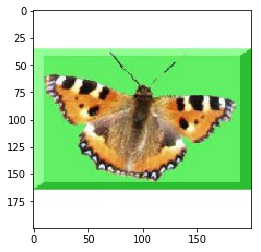

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
print("butterfly sınıfı tahmin sonuçları")
print("1.resim:")
test_image12 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/butterfly/image_0073.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image12)
plt.show()

test_image12 = image.img_to_array(test_image12)
test_image12= np.expand_dims(test_image12, axis=0)
result12 =  model.predict(test_image12)
train_generator.class_indices
result12


2.resim:


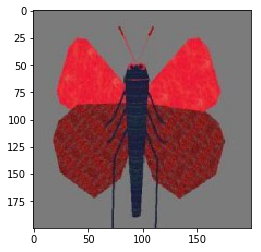

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
print("2.resim:")
test_image22 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/butterfly/image_0078.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image22)
plt.show()

test_image22 = image.img_to_array(test_image22)
test_image22= np.expand_dims(test_image22, axis=0)
result22= model.predict(test_image22)
result22


3.resim:


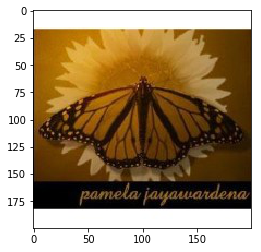

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [78]:
print("3.resim:")
test_image32 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/butterfly/image_0080.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image32)
plt.show()

test_image32 = image.img_to_array(test_image32)
test_image32= np.expand_dims(test_image32, axis=0)
result32 = model.predict(test_image32)
result32


4.resim:


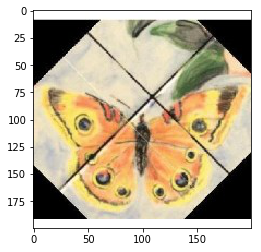

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
print("4.resim:")
test_image42 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/butterfly/image_0084.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image42)
plt.show()

test_image42= image.img_to_array(test_image42)
test_image42= np.expand_dims(test_image42, axis=0)
result42= model.predict(test_image42)
result42


5.resim:


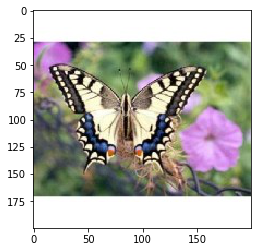

array([[0.0000000e+00, 9.9999237e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.5763883e-06, 0.0000000e+00]], dtype=float32)

In [81]:
print("5.resim:")
test_image52 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/butterfly/image_0090.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image52)
plt.show()

test_image52 = image.img_to_array(test_image52)
test_image52= np.expand_dims(test_image52, axis=0)
result52 = model.predict(test_image52)
result52

car sınıfı tahmin sonuçları
1.resim:


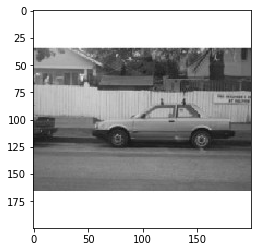

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [82]:
print("car sınıfı tahmin sonuçları")
print("1.resim:")
test_image13 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/car_side/image_0100.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image13)
plt.show()

test_image13 = image.img_to_array(test_image13)
test_image13= np.expand_dims(test_image13, axis=0)
result13 = model.predict(test_image13)
result13


2.resim:


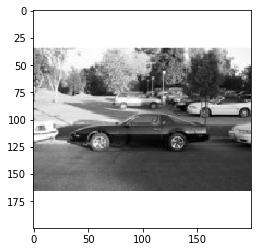

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [83]:
print("2.resim:")
test_image23 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/car_side/image_0104.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image23)
plt.show()

test_image23 = image.img_to_array(test_image23)
test_image23= np.expand_dims(test_image23, axis=0)
result23= model.predict(test_image23)
result23


3.resim:


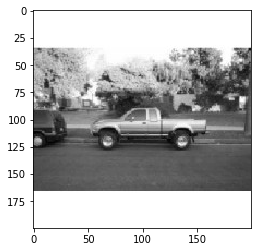

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
print("3.resim:")
test_image33 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/car_side/image_0109.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image33)
plt.show()

test_image33 = image.img_to_array(test_image33)
test_image33= np.expand_dims(test_image33, axis=0)
result33 = model.predict(test_image33)
result33


4.resim:


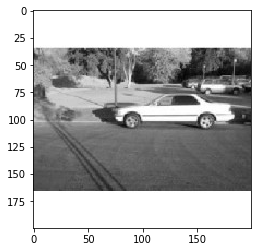

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [85]:
print("4.resim:")
test_image43 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/car_side/image_0103.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image43)
plt.show()

test_image43= image.img_to_array(test_image43)
test_image43= np.expand_dims(test_image43, axis=0)
result43= model.predict(test_image43)
result43


5.resim:


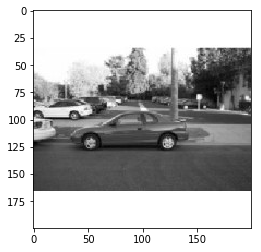

array([[0.0000000e+00, 1.8676745e-09, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [86]:
print("5.resim:")
test_image53 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/car_side/image_0106.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image53)
plt.show()

test_image53 = image.img_to_array(test_image53)
test_image53= np.expand_dims(test_image53, axis=0)
result53 = model.predict(test_image53)
result53

cellphone sınıfı tahmin sonuçları
1.resim:


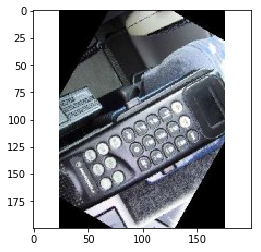

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
print("cellphone sınıfı tahmin sonuçları")
print("1.resim:")
test_image14 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cellphone/image_0048.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image14)
plt.show()

test_image14 = image.img_to_array(test_image14)
test_image14= np.expand_dims(test_image14, axis=0)
result14 = model.predict(test_image14)
result14


2.resim:


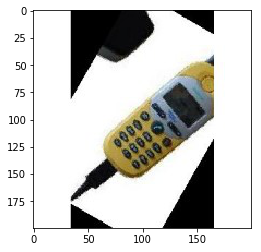

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [88]:
print("2.resim:")
test_image24 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cellphone/image_0049.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image24)
plt.show()

test_image24 = image.img_to_array(test_image24)
test_image24= np.expand_dims(test_image24, axis=0)
result24= model.predict(test_image24)
result24


3.resim:


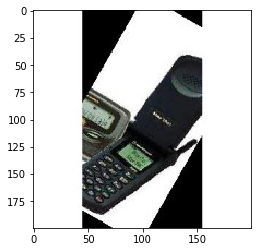

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [89]:
print("3.resim:")
test_image34 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cellphone/image_0050.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image34)
plt.show()

test_image34 = image.img_to_array(test_image34)
test_image34= np.expand_dims(test_image34, axis=0)
result34 = model.predict(test_image34)
result34


4.resim:


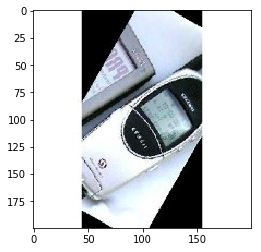

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [90]:
print("4.resim:")
test_image44 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cellphone/image_0051.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image44)
plt.show()

test_image44= image.img_to_array(test_image44)
test_image44= np.expand_dims(test_image44, axis=0)
result44= model.predict(test_image44)
result44


5.resim:


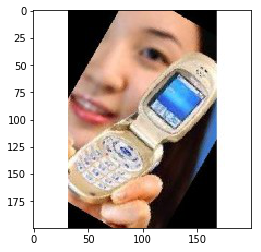

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [91]:
print("5.resim:")
test_image54 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cellphone/image_0052.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image54)
plt.show()

test_image54 = image.img_to_array(test_image54)
test_image54= np.expand_dims(test_image54, axis=0)
result54 = model.predict(test_image54)
result54

cup sınıfı tahmin sonuçları
1.resim:


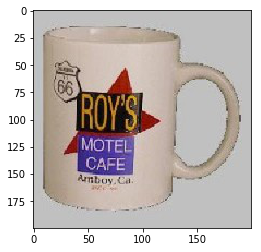

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [92]:
print("cup sınıfı tahmin sonuçları")
print("1.resim:")
test_image15 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cup/image_0047.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image15)
plt.show()

test_image15 = image.img_to_array(test_image15)
test_image15= np.expand_dims(test_image15, axis=0)
result15 = model.predict(test_image15)
result15


2.resim:


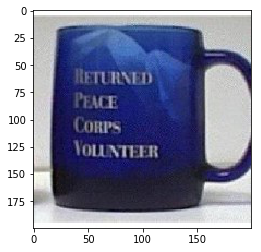

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [93]:
print("2.resim:")
test_image25 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cup/image_0048.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image25)
plt.show()

test_image25 = image.img_to_array(test_image25)
test_image25= np.expand_dims(test_image25, axis=0)
result25= model.predict(test_image25)
result25


3.resim:


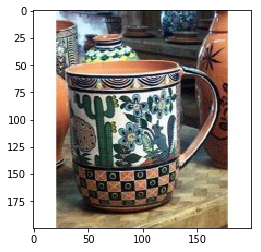

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [94]:
print("3.resim:")
test_image35 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cup/image_0049.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image35)
plt.show()

test_image35 = image.img_to_array(test_image35)
test_image35= np.expand_dims(test_image35, axis=0)
result35 = model.predict(test_image35)
result35


4.resim:


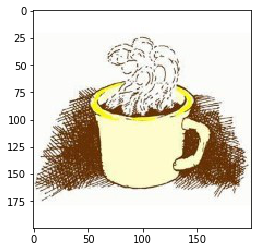

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
print("4.resim:")
test_image45 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cup/image_0050.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image45)
plt.show()

test_image45= image.img_to_array(test_image45)
test_image45= np.expand_dims(test_image45, axis=0)
result45= model.predict(test_image45)
result45


5.resim:


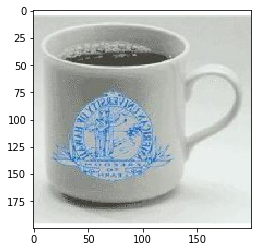

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [96]:
print("5.resim:")
test_image55 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/cup/image_0051.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image55)
plt.show()

test_image55 = image.img_to_array(test_image55)
test_image55= np.expand_dims(test_image55, axis=0)
result55 = model.predict(test_image55)
result55

dolphin sınıfı tahmin sonuçları
1.resim:


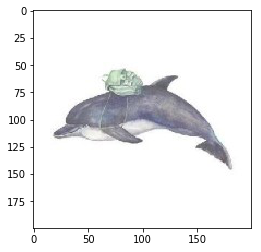

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [97]:
print("dolphin sınıfı tahmin sonuçları")
print("1.resim:")
test_image16 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/dolphin/image_0053.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image16)
plt.show()

test_image16 = image.img_to_array(test_image16)
test_image16= np.expand_dims(test_image16, axis=0)
result16 = model.predict(test_image16)
result16


2.resim:


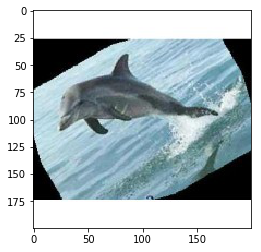

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.6850146e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [98]:
print("2.resim:")
test_image26 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/dolphin/image_0056.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image26)
plt.show()

test_image26 = image.img_to_array(test_image26)
test_image26= np.expand_dims(test_image26, axis=0)
result26= model.predict(test_image26)
result26


3.resim:


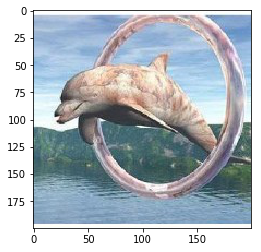

array([[9.725495e-28, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00]], dtype=float32)

In [99]:
print("3.resim:")
test_image36 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/dolphin/image_0057.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image36)
plt.show()

test_image36 = image.img_to_array(test_image36)
test_image36= np.expand_dims(test_image36, axis=0)
result36 = model.predict(test_image36)
result36


4.resim:


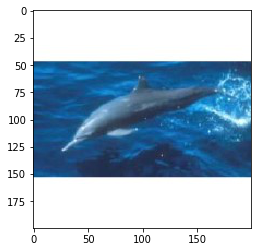

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [100]:
print("4.resim:")
test_image46 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/dolphin/image_0059.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image46)
plt.show()

test_image46= image.img_to_array(test_image46)
test_image46= np.expand_dims(test_image46, axis=0)
result46= model.predict(test_image46)
result46


5.resim:


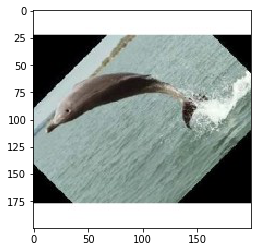

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [101]:
print("5.resim:")
test_image56 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/dolphin/image_0060.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image56)
plt.show()

test_image56 = image.img_to_array(test_image56)
test_image56= np.expand_dims(test_image56, axis=0)
result56 = model.predict(test_image56)
result56

headphones sınıfı tahmin sonuçları
1.resim:


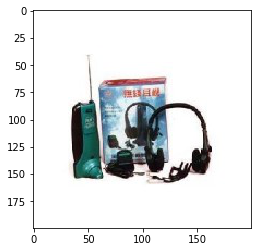

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [102]:
print("headphones sınıfı tahmin sonuçları")
print("1.resim:")
test_image17 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/headphones/image_0034.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image17)
plt.show()

test_image17 = image.img_to_array(test_image17)
test_image17= np.expand_dims(test_image17, axis=0)
result17 = model.predict(test_image17)
result17


2.resim:


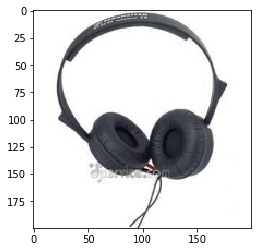

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [59]:
print("2.resim:")
test_image27 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/headphones/image_0039.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image27)
plt.show()

test_image27 = image.img_to_array(test_image27)
test_image27= np.expand_dims(test_image27, axis=0)
result27= model.predict(test_image27)
result27


3.resim:


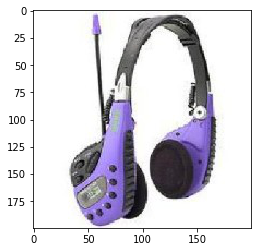

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [60]:
print("3.resim:")
test_image37 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/headphones/image_0035.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image37)
plt.show()

test_image37 = image.img_to_array(test_image37)
test_image37= np.expand_dims(test_image37, axis=0)
result37 = model.predict(test_image37)
result37


4.resim:


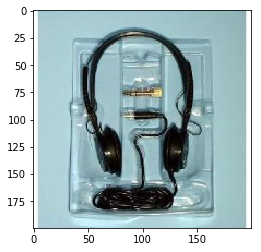

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [61]:
print("4.resim:")
test_image47= \
    image.load_img('C:/Users/havvanur/Desktop/data/test/headphones/image_0040.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image47)
plt.show()

test_image47= image.img_to_array(test_image47)
test_image47= np.expand_dims(test_image47, axis=0)
result47= model.predict(test_image47)
result47


5.resim:


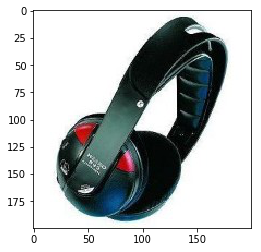

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [62]:
print("5.resim:")
test_image57 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/headphones/image_0041.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image57)
plt.show()

test_image57 = image.img_to_array(test_image57)
test_image57= np.expand_dims(test_image57, axis=0)
result57 = model.predict(test_image57)
result57

laptop sınıfı tahmin sonuçları
1.resim:


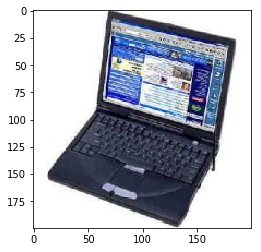

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [53]:
print("laptop sınıfı tahmin sonuçları")
print("1.resim:")
test_image18 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/laptop/image_0074.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image18)
plt.show()

test_image18 = image.img_to_array(test_image18)
test_image18= np.expand_dims(test_image18, axis=0)
result18 = model.predict(test_image18)
result18



2.resim:


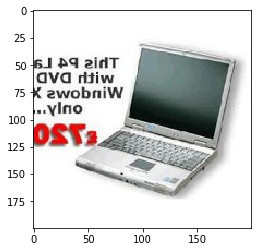

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [54]:
print("2.resim:")
test_image28 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/laptop/image_0067.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image28)
plt.show()

test_image28 = image.img_to_array(test_image28)
test_image28= np.expand_dims(test_image28, axis=0)
result28= model.predict(test_image28)
result28

3.resim:


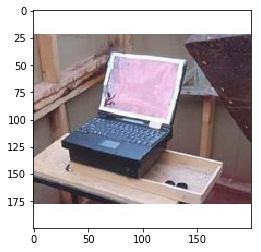

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [55]:
print("3.resim:")
test_image38 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/laptop/image_0066.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image38)
plt.show()

test_image38 = image.img_to_array(test_image38)
test_image38= np.expand_dims(test_image38, axis=0)
result38 = model.predict(test_image38)
result38


4.resim:


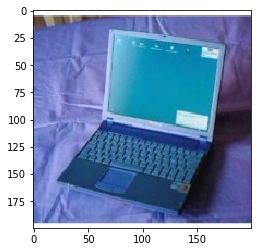

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [56]:
print("4.resim:")
test_image48 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/laptop/image_0065.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image48)
plt.show()

test_image48= image.img_to_array(test_image48)
test_image48= np.expand_dims(test_image48, axis=0)
result48= model.predict(test_image48)
result48


5.resim:


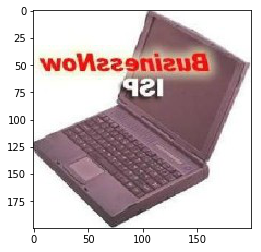

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [57]:
print("5.resim:")
test_image58 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/laptop/image_0069.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image58)
plt.show()

test_image58 = image.img_to_array(test_image58)
test_image58= np.expand_dims(test_image58, axis=0)
result58 = model.predict(test_image58)
result58

motorbikes sınıfı tahmin sonuçları
1.resim:


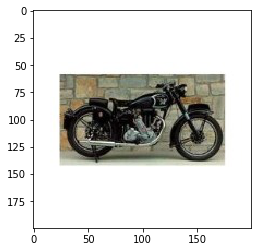

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [48]:
print("motorbikes sınıfı tahmin sonuçları")
print("1.resim:")
test_image19 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/motorbikes/image_0652.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image19)
plt.show()

test_image19 = image.img_to_array(test_image19)
test_image19= np.expand_dims(test_image19, axis=0)
result19 = model.predict(test_image19)
result19


2.resim:


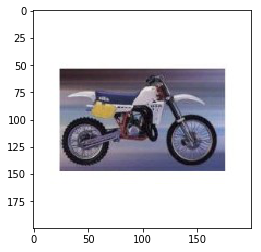

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [49]:
print("2.resim:")
test_image29 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/motorbikes/image_0649.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image29)
plt.show()

test_image29 = image.img_to_array(test_image29)
test_image29= np.expand_dims(test_image29, axis=0)
result29= model.predict(test_image29)
result29


3.resim:


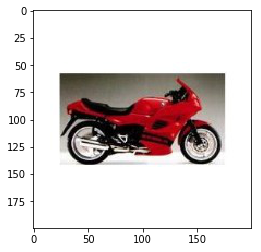

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [50]:
print("3.resim:")
test_image39 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/motorbikes/image_0641.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image39)
plt.show()

test_image39 = image.img_to_array(test_image39)
test_image39= np.expand_dims(test_image39, axis=0)
result39 = model.predict(test_image39)
result39


4.resim:


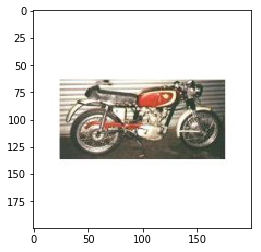

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [51]:
print("4.resim:")
test_image49 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/motorbikes/image_0650.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image49)
plt.show()

test_image49= image.img_to_array(test_image49)
test_image49= np.expand_dims(test_image49, axis=0)
result49= model.predict(test_image49)
result49


5.resim:


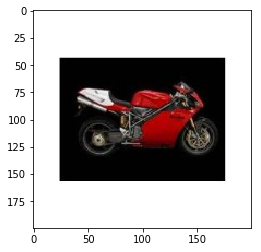

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [52]:
print("5.resim:")
test_image59 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/motorbikes/image_0729.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image59)
plt.show()

test_image59 = image.img_to_array(test_image59)
test_image59= np.expand_dims(test_image59, axis=0)
result59 = model.predict(test_image59)
result59

pizza sınıfı tahmin sonuçları
1.resim:


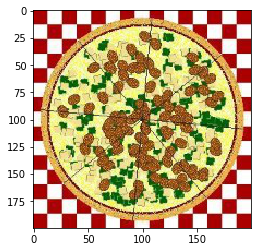

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [43]:
print("pizza sınıfı tahmin sonuçları")
print("1.resim:")
test_image10 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/pizza/image_0052.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image10)
plt.show()

test_image10 = image.img_to_array(test_image10)
test_image10= np.expand_dims(test_image10, axis=0)
result0 = model.predict(test_image10)
result0

2.resim:


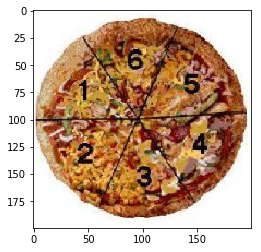

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [44]:
print("2.resim:")
test_image20 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/pizza/image_0049.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image20)
plt.show()

test_image20 = image.img_to_array(test_image20)
test_image20= np.expand_dims(test_image20, axis=0)
result20= model.predict(test_image20)
result20

3.resim:


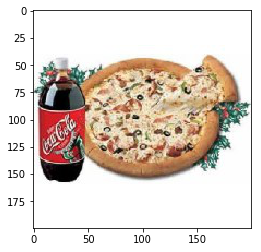

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [45]:
print("3.resim:")
test_image30 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/pizza/image_0043.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image30)
plt.show()

test_image30 = image.img_to_array(test_image30)
test_image30= np.expand_dims(test_image30, axis=0)
result30 = model.predict(test_image30)
result30

4.resim:


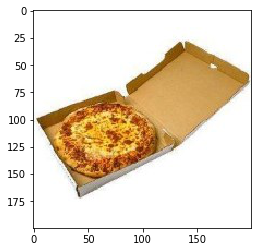

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
print("4.resim:")
test_image40 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/pizza/image_0050.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image40)
plt.show()

test_image40= image.img_to_array(test_image40)
test_image40= np.expand_dims(test_image40, axis=0)
result40= model.predict(test_image40)
result40

5.resim:


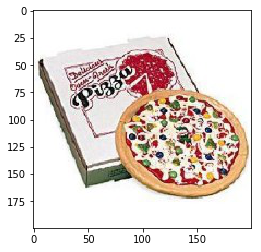

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [47]:
print("5.resim:")
test_image50 = \
    image.load_img('C:/Users/havvanur/Desktop/data/test/pizza/image_0048.jpg'
                   , target_size=(200, 200))
plt.imshow(test_image50)
plt.show()

test_image50 = image.img_to_array(test_image50)
test_image50= np.expand_dims(test_image50, axis=0)
result50 = model.predict(test_image50)
result50